# Regresión lineal

### Regresión simple

In [335]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [336]:
df = pd.read_csv("trees.csv")

Visualizamos una parte de nuestro conjunto de datos

In [337]:
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [338]:
df.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


In [339]:
df.shape

(31, 3)

Definimos a **Girth** y **Heigth** como **variables independientes** y a **Volume** como **variable dependiente**.

Luego, graficamos cada variable independiente vs la variable independiente para tratar de identificar alguna
relación que nos recuerde a alguna función matemática conocida.

<function matplotlib.pyplot.show(close=None, block=None)>

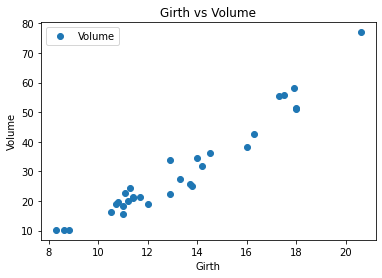

In [340]:
df.plot(x='Girth', y='Volume',style='o')
plt.title('Girth vs Volume')
plt.xlabel('Girth')
plt.ylabel('Volume')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

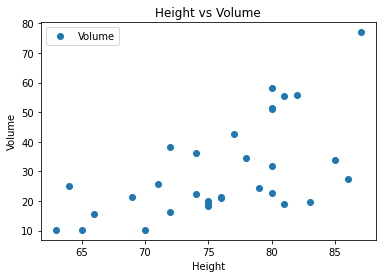

In [341]:
df.plot(x='Height', y='Volume',style='o')
plt.title('Height vs Volume')
plt.xlabel('Height')
plt.ylabel('Volume')
plt.show

De esta forma, podemos notar una correlación lineal entre las variables **Grith** y **Volume**; por lo que construiremos primero el modelo sólo considerándo a ésta. Para esto, primero dividimos nuestros datos en conjunto de prueba y entrenamiento.

In [342]:
X_1 = df[['Girth']] # Seleccionamos la columna Girth
y_1 = df['Volume'] # Seleccionamos la columna de Volume

(Decidimos usar **train_test_split** pues al dividir los conjuntos a manita los resultados finales eran un poco malos.)

In [343]:
# Divivimos el conjunto en un 80-20%
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.2, random_state=9)

Ajustamos el modelo lineal a los datos de entrenamiento y los ponemos a prueba sobre los datos de prueba.

In [344]:
# Creamos el modelo.
modelo = LinearRegression()
# Entrenamos nuestro modelo.
modelo.fit(X_train1, y_train1)

LinearRegression()

In [345]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)

Coefficients: 
 [5.15817153]
Independent term: 
 -37.807935688713506


Esto significa que cuando **girth** incrementa en una pulgada, entonces **volume** incrementa en **5.15** pies cúbicos.

In [346]:
# Realizamos predicciones usando el conjunto de prueba.
y_pred1 = modelo.predict(X_test1)

In [347]:
dfp = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})

dfp

,Actual,Predicted
9,19.9,19.963585
4,18.8,17.384500
23,38.3,44.722809
7,18.2,18.931951
5,19.7,17.900317
3,16.4,16.352865
18,25.7,32.859014


In [348]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test1, y_pred1))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test1, y_pred1))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test1, y_pred1)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test1, y_pred1))

Mean Absolute Error: 2.52
Mean squared error: 14.04
Root Mean Squared Error: 3.75
Variance score: 0.71


Donde podemos observar que el MSE es alto.

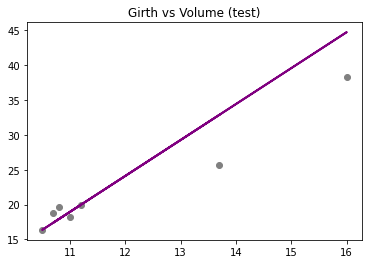

In [349]:
fig,ax1 = plt.subplots()
ax1.scatter(X_test1, y_test1,  color='gray')
ax1.plot(X_test1, y_pred1, color='purple', linewidth=2)
ax1.set_title('Girth vs Volume (test)')
plt.show()

### Regresión múltiple

Ahora bien, construimos la regresión múltiple utilizando Grith y Heigth.

Separamos nuestro conjunto en entrenamiento y prueba, como lo hicimos anteriormente.

In [350]:
X_2 = df[['Girth', 'Height']] # Seleccionamos las columnas de Girth y Height
y_2 = df['Volume'] # Seleccionamos la columna de Volume

In [351]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=9)

In [352]:
# Creamos el modelo.
modelo_bueno = LinearRegression()
# Entrenamos nuestro modelo.
modelo_bueno.fit(X_train2, y_train2)

LinearRegression()

In [353]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

coef_df

,Coefficient
Girth,4.632494
Height,0.403138


Esto significa que cuando **girth** incrementa en una pulgada, entonces **volume** incrementa en **4.63** pies cúbicos (suponiéndo que **height** no cambia). De manera análoga, cuando **heigth** incrementa en **0.403** pies cúbicos (suponiéndo que **girth** no cambia).

In [354]:
# Veamos los coeficientes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', modelo_bueno.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo_bueno.intercept_)

Coefficients: 
 [4.75953742 0.30065596]
Independent term: 
 -55.267302656506054


In [355]:
# Realizamos predicciones usando el conjunto de prueba.
y_pred2 = modelo_bueno.predict(X_test2)

In [356]:
dfp2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})

dfp2

,Actual,Predicted
9,19.9,20.588713
4,18.8,20.012880
23,38.3,42.532525
7,18.2,19.636806
5,19.7,21.090146
3,16.4,16.355069
18,25.7,31.284933


In [357]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test2, y_pred2))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test2, y_pred2))

Mean Absolute Error: 2.08
Mean squared error: 7.86
Root Mean Squared Error: 2.80
Variance score: 0.84


Podemos notar que el MSE disminuyó casi a la mitad, en comparación al MSE anterior (donde sólo considerábamos a la variable Girth). 

Tambien el puntaje de varianza (r2) mejoró con respecto al puntaje anterior.